In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from ONN import ONN
import threading, time

np.seterr(all='raise')

import scipy
from scipy import signal
import DataUtils as dutl

import networkx as nx

#dutils = dutl.DataUtils()
#%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


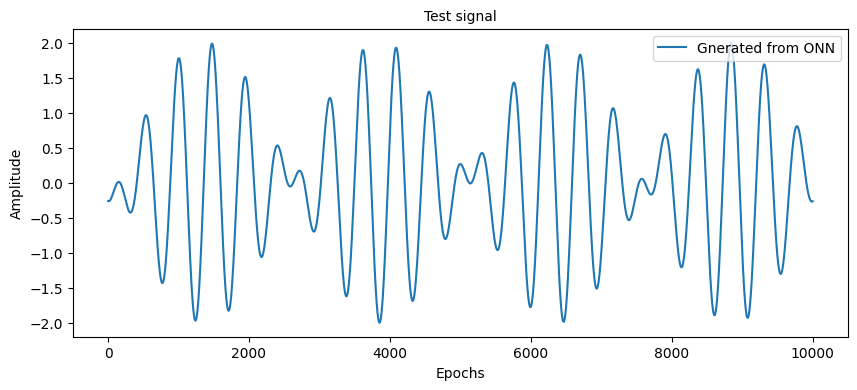

In [4]:
o = ONN(N=2, NEPOCHS=200)

# #vald_signal, vald_signal_, signal_ = o.generate_test_samples()
testSignal = o.generate_test_samples(NSAMPLES=10000)

# print(vald_signal.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.plot(np.linspace(1, len(testSignal), len(testSignal)), testSignal, label="Gnerated from ONN")
plt.xlabel("Epochs")
plt.ylabel("Amplitude")
plt.title("Test signal")
plt.legend()
plt.show()

# scalar = preprocessing.MinMaxScaler(feature_range=(-3, 3))
# scaled_data = testSignal 
# time = np.linspace(1, len(scaled_data), len(scaled_data))

In [6]:
o.A = o.A_Test
signal, phase_diff, phases = o.delete_me(o.NSAMPLES, 1/o.SAMPLING_RATE, 
                                 o.PHI, o.OMEGA, o.A, o.ALPHA)
print("done")

done


In [8]:
o.A

array([[0, 0],
       [0, 0]])

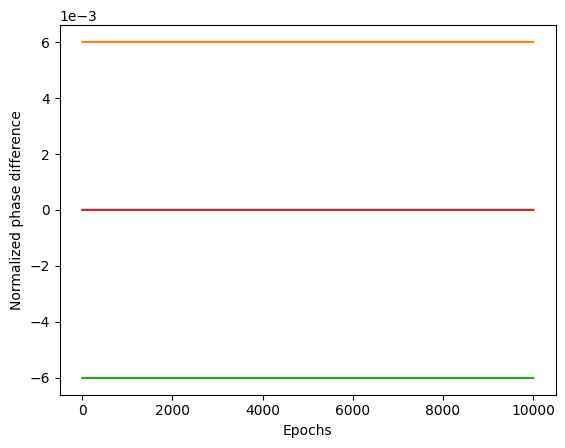

In [7]:
"""
Does increasing weight causes stebalized phase relationship?
"""

epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Normalized phase difference")

for i in range(o.N):
    for j in range(o.N):
        plt.plot(epochs, phase_diff[:,i,j])
plt.show()

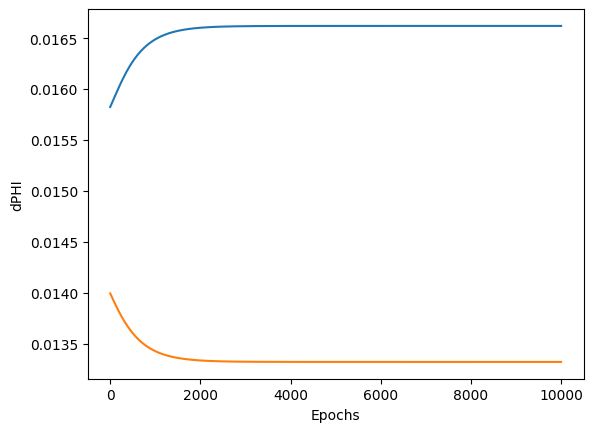

In [23]:
"""
Once stabilied phase relationship is establed, 
what happens to frequency of oscillattion of individual oscillator?
"""
epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("dPHI")

for i in range(o.N):
    plt.plot(epochs, phases[:,i])
plt.show()

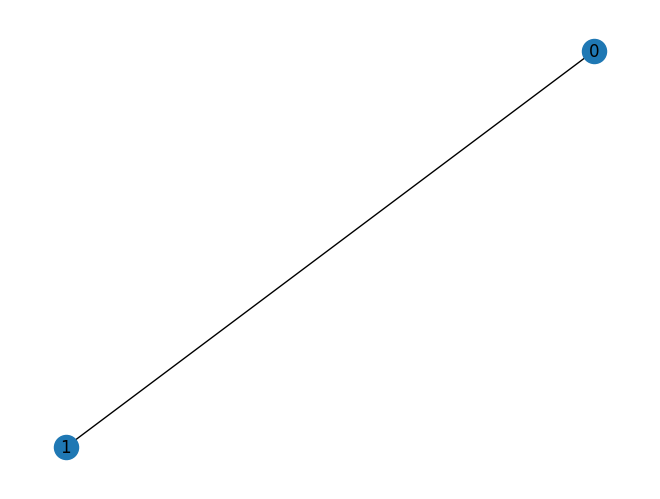

In [21]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(o.A_Test)

# Draw the graph
pos = nx.circular_layout(G)
f = plt.figure()
nx.draw(G, pos, with_labels=True)
plt.show()

In [75]:
o.ALPHA = o.ALPHA_Test
o.OMEGA = o.OMEGA_Test
o.PHI = o.PHI_Test
    
o.A = 0.9*o.A_Test
dummySignal = o.generate_samples(o.NSAMPLES, 0.001, o.PHI, 
                                    o.OMEGA, o.A, o.ALPHA)